# Checking that no U-curve of price with tech-param=3 like on 2021.06.23

## Experiment info

git commit: [4cfcc93725ec1482236fcc30d765f754f90b6679](https://github.com/jzkelter/tabular-standards/commit/4cfcc93725ec1482236fcc30d765f754f90b6679)


Experiment 1
```
["setup-structure" "Two-Layer-.25PG-to-1CG.json" "Two-Layer-1PG-1CG.json"]
["max-prod-capacity-per-capita" 0.1 0.5 1 1.5 2 2.25 2.5 2.75 2.85 3 4 5 6 8 10]
["minimum-wage" 0.8 2.5]
["n-households" 500]
["n-firms" 30]
["DIMINISHING-UTILITY-CONSTANT" 0.5]
["firm-memory-constant" 0.8]
["alpha" 1]
["layoff-probability" 0.5]
["index-in-use" "no index"]
["firm-competency" 0]
["transactions-per-month" 1]
["mean-new-agreements-per-month" 2]
["fix-n-framework-agreements?" false]
["framework-duration" 24]
```
Time limit: 3000 for max-prod-capacity-per-capita>1 and 6000 for <1

reporters:
```
unemployment-rate
mean-consumer-demand-not-satisfied
mean-firm-demand-not-satisfied
total-sales
cg-production
consumer-demand
mean-wage-rate
mean-cg-wage-rate
mean-pg-wage-rate
mean-cg-price
mean-pg-price
mean-current-profit-all-firms
mean-lifetime-profit-all-firms
mean-current-profit-cg-firms
mean-lifetime-profit-cg-firms
mean-current-profit-pg-firms
mean-lifetime-profit-pg-firms
turnover-rate
bankrupt-firms
mean-age
mean-inventories
pringle-index-value
coats-index-value
ussher-index-value
potvin-index-value
gini-coefficient
```

## data processing and helper functions

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


filename = "2-firms-vary-primary-prod-capacity.csv"
df1 = pd.read_csv(filename, skiprows=6)

filename = "2-firms-1-to-1-ratio-vary-primary-prod-capacity.csv"
df2 = pd.read_csv(filename, skiprows=6)

df = pd.concat([df1, df2])

def map_setup_structure_to_firm_ratio(ss):
    if ".25PG" in ss:
        return 0.25
    elif "1PG" in ss:
        return 1
    
df["pg-to-cg-ratio"] = df['setup-structure'].apply(map_setup_structure_to_firm_ratio)
#  "Single-PG&CG-TC=2.json" "Single-PG&CG-TC=3.json"
# ## tech parameter of
# df1 = df[df["setup-structure"] == "Single-PG&CG-TC=1.json"]

# # ## Two layer setup PG -> CG setup
# # df2 = df[df["setup-structure"] == "Two-Layer-PG-CG.json"]




In [7]:
df.columns

Index(['[run number]', 'setup-structure', 'max-prod-capacity-per-capita',
       'minimum-wage', 'n-households', 'n-firms',
       'DIMINISHING-UTILITY-CONSTANT', 'firm-memory-constant', 'alpha',
       'layoff-probability', 'index-in-use', 'firm-competency',
       'transactions-per-month', 'mean-new-agreements-per-month',
       'fix-n-framework-agreements?', 'framework-duration', '[step]',
       'unemployment-rate', 'mean-consumer-demand-not-satisfied',
       'mean-firm-demand-not-satisfied', 'total-sales', 'cg-production',
       'consumer-demand', 'mean-wage-rate', 'mean-cg-wage-rate',
       'mean-pg-wage-rate', 'mean-cg-price', 'mean-pg-price',
       'mean-current-profit-all-firms', 'mean-lifetime-profit-all-firms',
       'mean-current-profit-cg-firms', 'mean-lifetime-profit-cg-firms',
       'mean-current-profit-pg-firms', 'mean-lifetime-profit-pg-firms',
       'turnover-rate', 'bankrupt-firms', 'mean-age', 'mean-inventories',
       'pringle-index-value', 'coats-index-val

In [23]:
PLOT_VARS = ['unemployment-rate', 'total-sales', 'cg-production', 'consumer-demand', 
             'mean-wage-rate', 'mean-cg-wage-rate', 'mean-pg-wage-rate', 'mean-cg-price', 'mean-pg-price',
             'turnover-rate', 'mean-consumer-demand-not-satisfied', 'mean-firm-demand-not-satisfied',
             'bankrupt-firms', 'mean-current-profit-all-firms', 'mean-lifetime-profit-all-firms',    
             'mean-current-profit-cg-firms', 'mean-lifetime-profit-cg-firms', 'mean-current-profit-pg-firms', 'mean-lifetime-profit-pg-firms',
             'mean-age', 'mean-inventories', 'pringle-index-value', 'coats-index-value', 
             'ussher-index-value', 'potvin-index-value', 'gini-coefficient']

def plot_mean_vs_prod_capacity(ladf, var):    
    plt.figure()
    min_wages = ladf['minimum-wage'].unique()
    for mw in min_wages:
        tladf = ladf[ladf['minimum-wage']==mw]
        plt.plot(tladf['max-prod-capacity-per-capita'], tladf[var])

    plt.legend(min_wages)
    plt.xlabel("max productive capacity per capita")
    plt.ylabel(var)
    plt.title(var + " vs Max Productive Capacity")    
    plt.show()

def plot_vars_vs_prod_capacity(ladf):        
    for v in PLOT_VARS:
        plot_mean_vs_prod_capacity(ladf, v)
        
def plot_timeseries(ldf, var):
    plt.figure()
    plt.plot(ldf['[step]'], ldf[var])
    plt.xlabel("ticks")
    plt.ylabel(var)
    plt.title(var + " timeseries")   
    plt.show()

def plot_var_timeseries(ldf):
    for v in PLOT_VARS:
        plot_timeseries(ldf, v)

## Single-PG&CG-Firm 

### plot mean variables

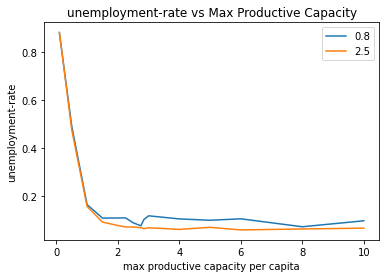

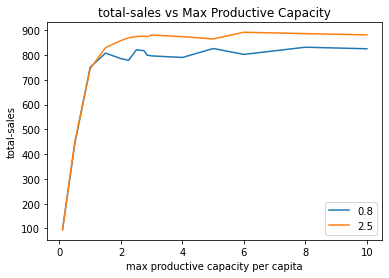

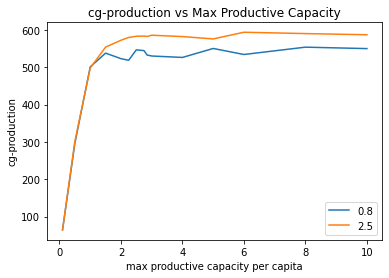

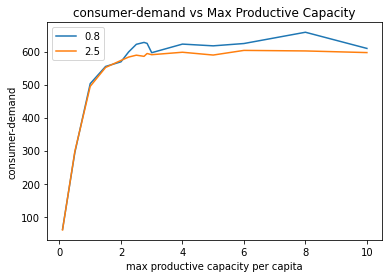

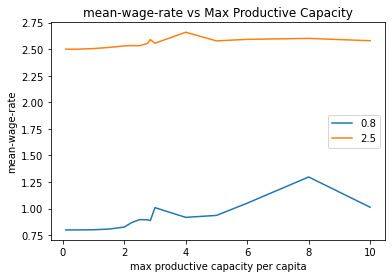

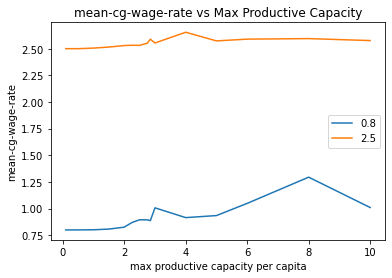

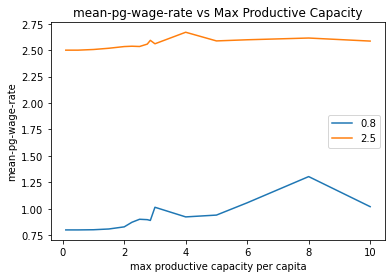

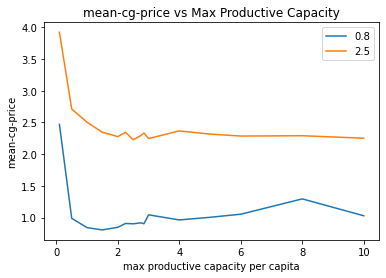

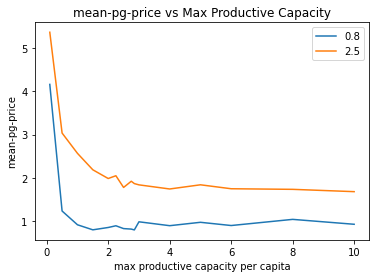

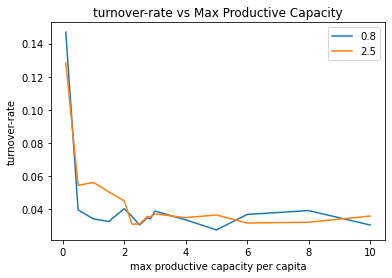

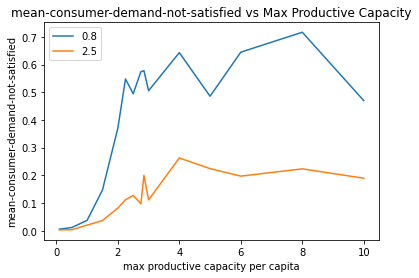

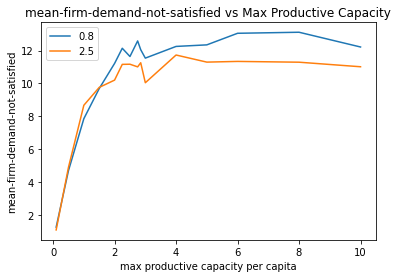

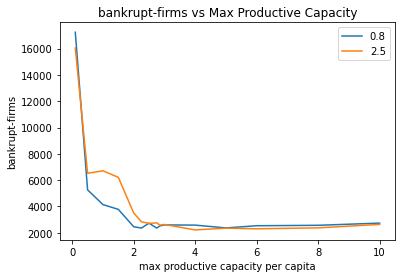

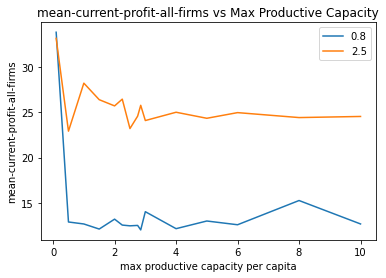

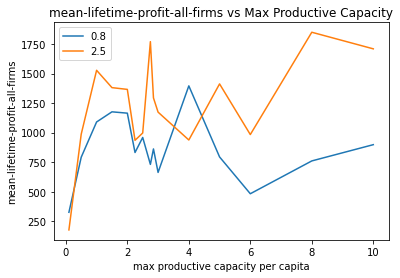

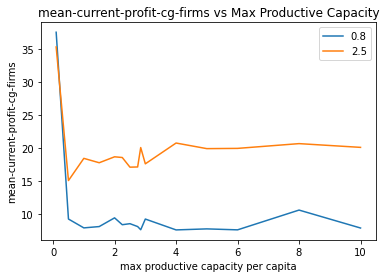

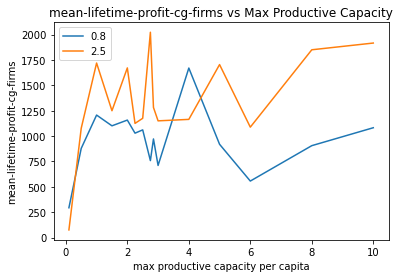

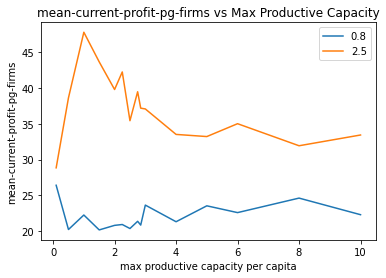

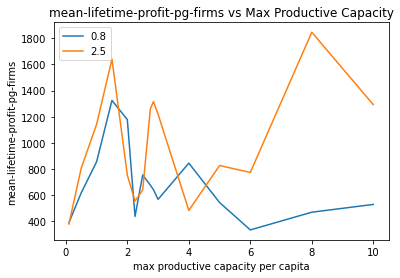

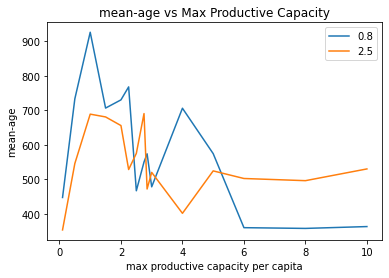

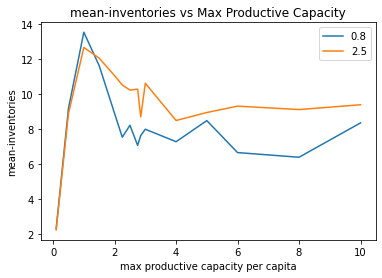

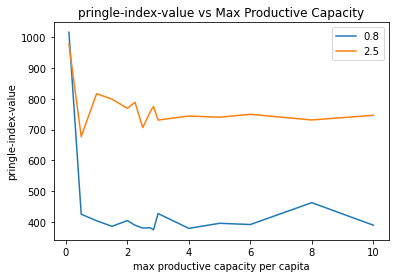

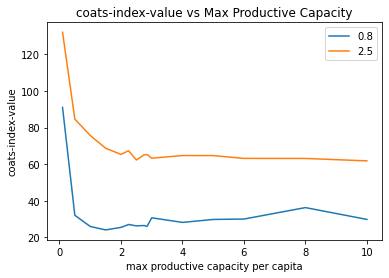

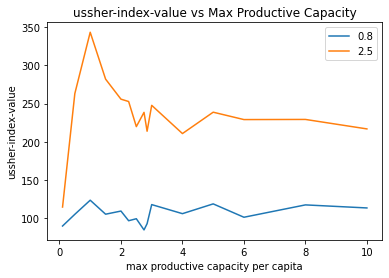

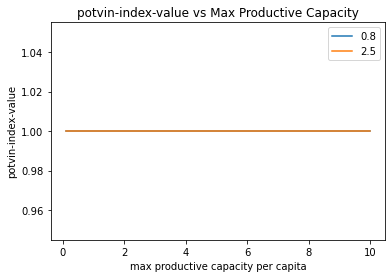

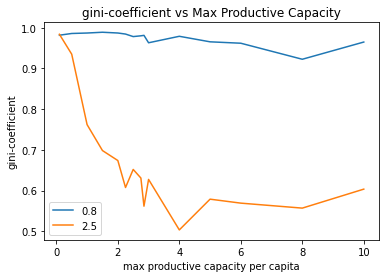

In [47]:
#  "Single-PG&CG-TC=1.json" 
# "Single-PG&CG-TC=2.json"
# adf = df[(df['[step]'] >= 2000) & (df['setup-structure']=="Single-PG&CG-TC=2.json")].groupby('max-prod-capacity-per-capita').mean()
adf = df[(df['[step]'] >= 2000)].groupby(['max-prod-capacity-per-capita', 'minimum-wage', 'pg-to-cg-ratio']).mean().reset_index()
plot_vars_vs_prod_capacity(adf[adf['pg-to-cg-ratio']==1])


In [21]:
cols = ['mean-wage-rate', 'mean-cg-wage-rate', 'mean-pg-wage-rate']
# adf[adf["pg-to-cg-ratio"]==0.25][cols]

In [25]:
# adf2 = df.groupby('max-prod-capacity-per-capita').std()
# plot_vars_vs_prod_capacity(adf2)

### Plot individual trajectory

In [35]:
df["max-prod-capacity-per-capita"].unique()

array([ 0.1 ,  0.5 ,  1.  ,  1.5 ,  2.  ,  2.25,  2.5 ,  2.75,  2.85,
        3.  ,  4.  ,  5.  ,  6.  ,  8.  , 10.  ])

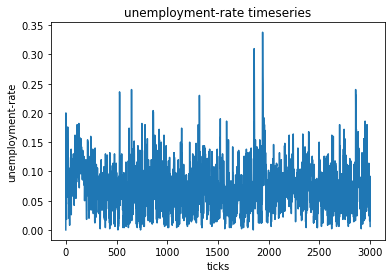

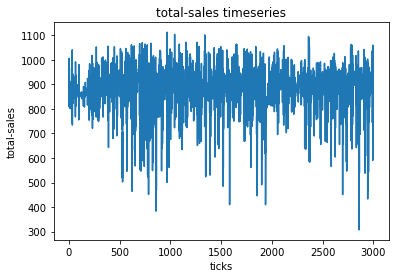

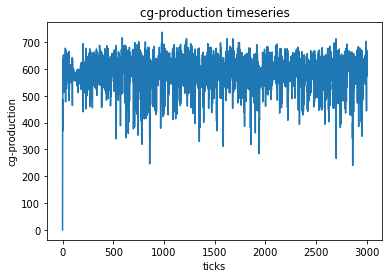

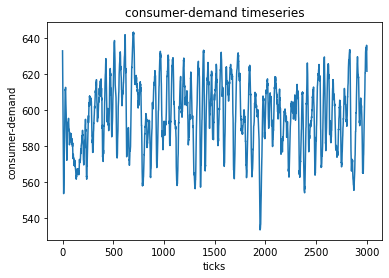

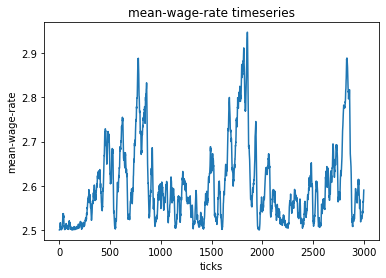

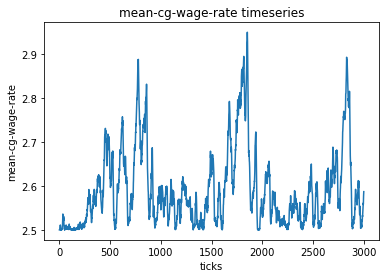

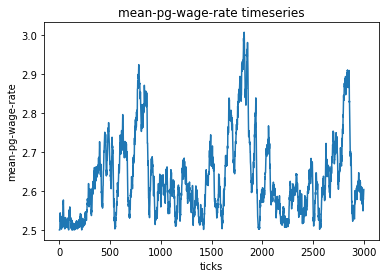

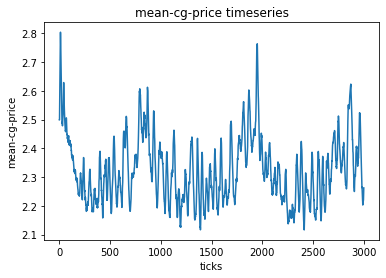

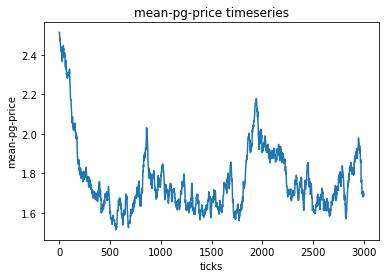

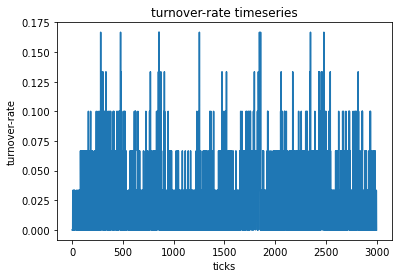

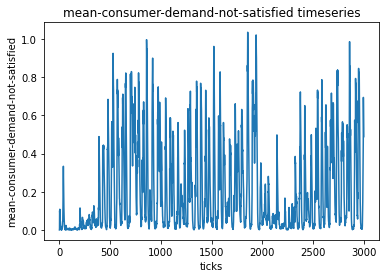

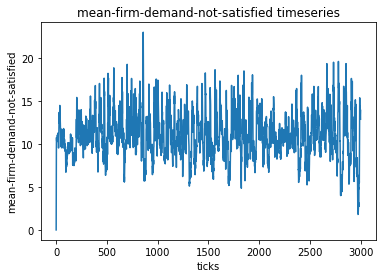

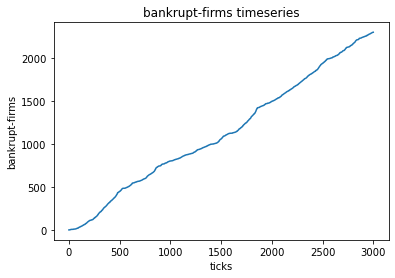

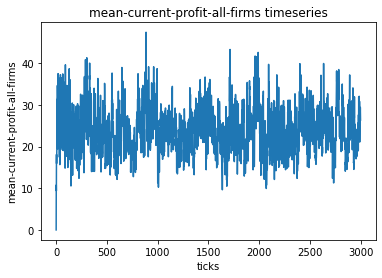

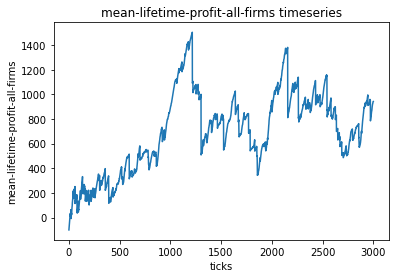

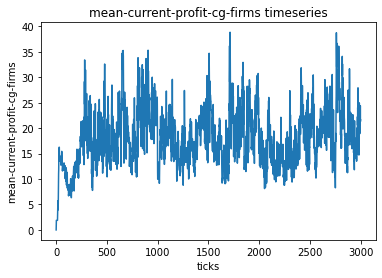

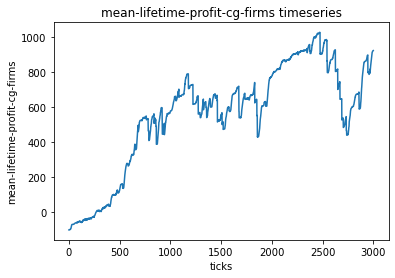

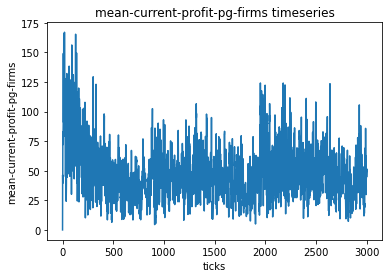

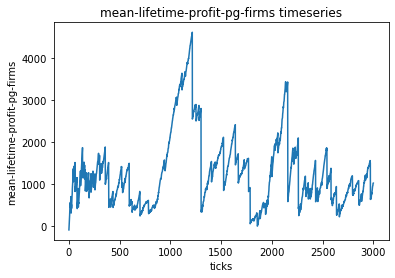

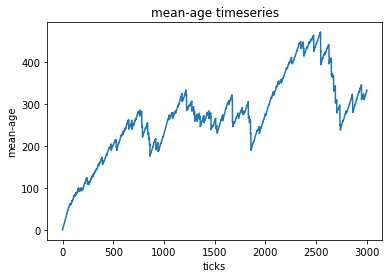

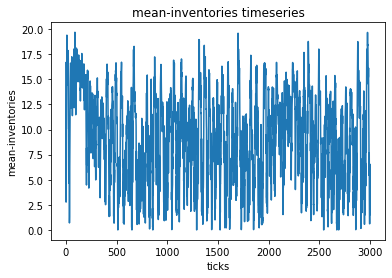

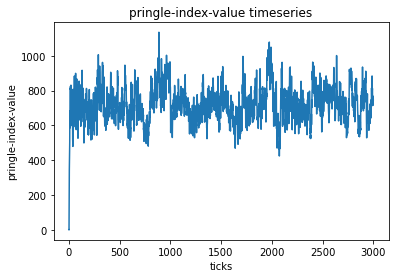

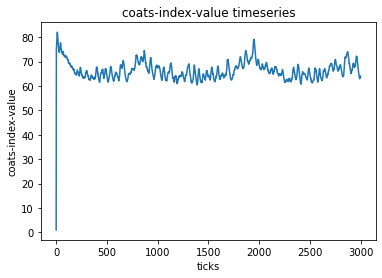

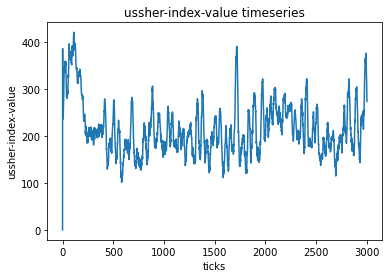

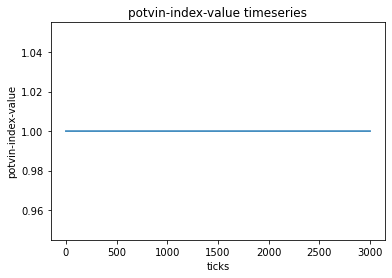

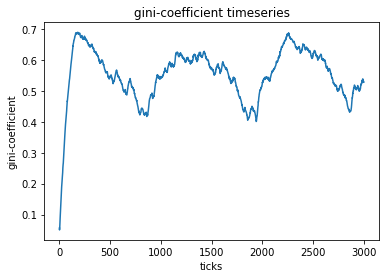

In [59]:
tdf = df[(df["max-prod-capacity-per-capita"] == 10) & (df["minimum-wage"] == 2.5) & (df["pg-to-cg-ratio"]==.25)]
plot_var_timeseries(tdf)